In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv(r'C:\Users\my computer\Documents\Data Science\Assignments\Simple Linear Regression\delivery_time.csv')

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df=df.rename({'Delivery Time':'Y', 'Sorting Time':'X'},axis=1)
df

,Y,X
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
df.corr()

,Y,X
Y,1.000000,0.825997
X,0.825997,1.000000


<Axes: >

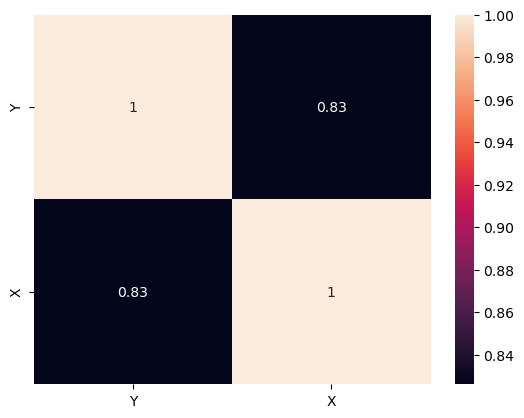

In [10]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='X', ylabel='Y'>

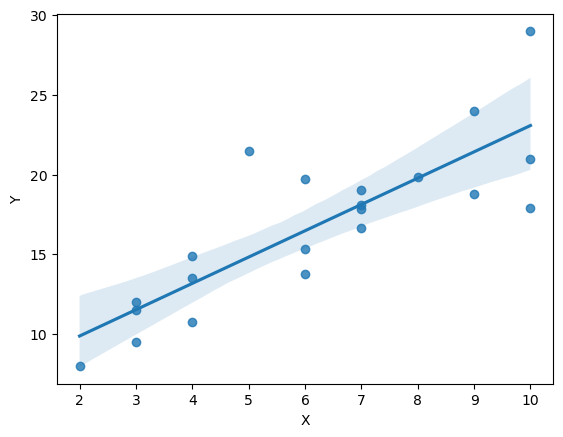

In [11]:
sns.regplot(x=df['X'],y=df['Y'])

Text(0.5, 1.0, 'Delivery Time')

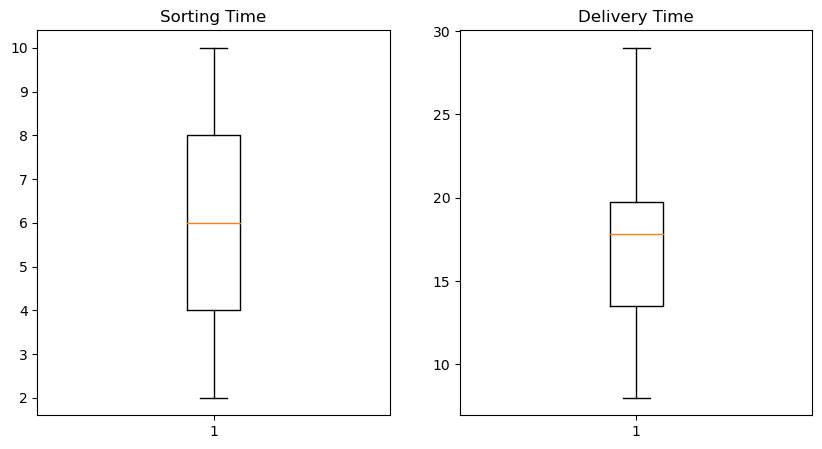

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['X'])
plt.title('Sorting Time')
plt.subplot(1,2,2)
plt.boxplot(df['Y'])
plt.title('Delivery Time')

Text(0.5, 1.0, 'Homoscedasticity')

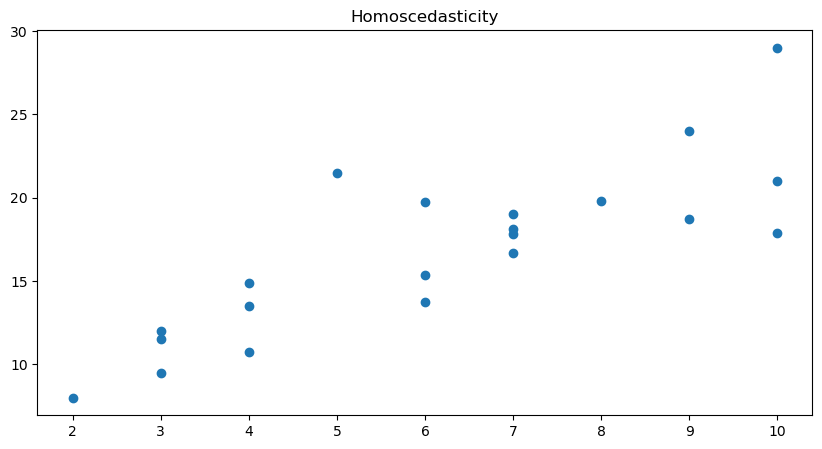

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['Y'])
plt.title('Homoscedasticity')

C:\Users\my computer\AppData\Local\Temp\ipykernel_1556\2943661288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Y'],bins=10,kde=True)
C:\Users\my computer\AppData\Local\Temp\ipykernel_1556\2943661288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Y']),bins=10,kde=True)


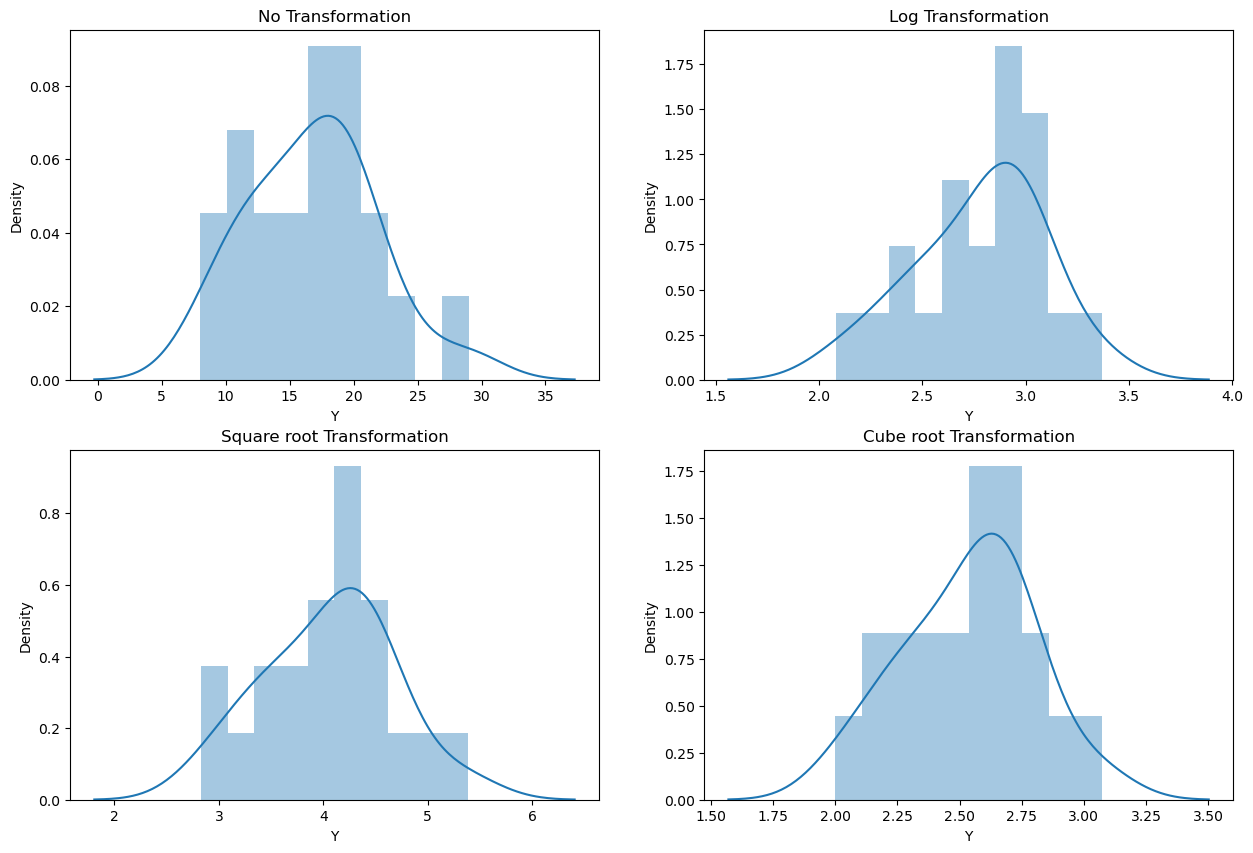

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['Y'],bins=10,kde=True)
plt.title('No Transformation')
plt.subplot(2,2,2)
sns.distplot(np.log(df['Y']),bins=10,kde=True)
plt.title('Log Transformation')
plt.subplot(2,2,3)
sns.distplot(np.sqrt(df['Y']),bins=10,kde=True)
plt.title('Square root Transformation')
plt.subplot(2,2,4)
sns.distplot(np.cbrt(df['Y']),bins=10,kde=True)
plt.title('Cube root Transformation')
plt.show()

#### No Transformation Model

In [24]:
m1=smf.ols(formula='X~Y',data=df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:04:41   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
Y              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Log Transformation Model

In [28]:
m2=smf.ols(formula='np.log(X)~np.log(Y)',data=df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(X)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                        14:07:18   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(Y)      1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Square Root Transformation Model

In [29]:
m3=smf.ols(formula='np.sqrt(X)~np.sqrt(Y)',data=df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(X)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                        14:09:41   Log-Likelihood:                -2.3695
No. Observations:                  21   AIC:                             8.739
Df Residuals:                      19   BIC:                             10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5151      0.417     -1.236      0.232      -1.388       0.357
np.sqrt(Y)     0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Cube Root Transformation model

In [30]:
m4=smf.ols(formula='np.cbrt(X)~np.cbrt(Y)',data=df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.cbrt(X)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                        14:10:41   Log-Likelihood:                 12.617
No. Observations:                  21   AIC:                            -21.23
Df Residuals:                      19   BIC:                            -19.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4315      0.302     -1.431      0.169      -1.063       0.200
np.cbrt(Y)     0.8800      0.118      7.433      0.000       0.632       1.128
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.078   Prob(JB):                        0.985
Kurtosis:                       2.894   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
m1.predict(df)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [32]:
m2.predict(df)

0     2.077042
1     1.506074
2     1.997737
3     2.249601
4     2.494153
5     1.672035
6     1.947707
7     1.051972
8     1.870638
9     1.930591
10    2.002961
11    1.211715
12    1.779416
13    1.298868
14    1.357093
15    1.631849
16    1.529786
17    1.885711
18    0.829895
19    1.865575
20    2.107450
dtype: float64

In [33]:
m3.predict(df)

0     2.819136
1     2.158237
2     2.718380
3     3.049347
4     3.403090
5     2.335531
6     2.656391
7     1.727485
8     2.563216
9     2.635457
10    2.724923
11    1.870465
12    2.456462
13    1.952279
14    2.008496
15    2.291550
16    2.182877
17    2.581221
18    1.542838
19    2.557191
20    2.858595
dtype: float64

In [34]:
m4.predict(df)

0     1.996327
1     1.663842
2     1.947166
3     2.106833
4     2.272113
5     1.755490
6     1.916667
7     1.432234
8     1.870447
9     1.906322
10    1.950374
11    1.510634
12    1.816913
13    1.554790
14    1.584847
15    1.732937
16    1.676697
17    1.879414
18    1.328472
19    1.867442
20    2.015445
dtype: float64

In [47]:
rmse1=np.sqrt(mean_squared_error(df['Y'],m1.predict(df)))
rmse2=np.sqrt(mean_squared_error(df['Y'],m2.predict(df)))
rmse3=np.sqrt(mean_squared_error(df['Y'],m3.predict(df)))
rmse4=np.sqrt(mean_squared_error(df['Y'],m4.predict(df)))
rmse1,rmse2,rmse3,rmse4

(10.990921514737984, 15.737409730413473, 15.049725260907637, 15.71961257805871)

In [49]:
print(m1.rsquared,m1.aic)
print(m2.rsquared,m2.aic)
print(m3.rsquared,m3.aic)
print(m4.rsquared,m4.aic)

0.6822714748417231 77.67751459767746
0.77216134926874 -0.3826084082226515
0.7292011987544664 8.739071042018885
0.7441167577566272 -21.233125493638724


# Log Transformation model is the best model